## NAMA  : Muhammad Bastian Hanafi
## NIM   : 20.11.3714
## KELAS : 20 IF 07

import library

In [1]:
import sklearn
import pandas as pd
import numpy as np

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 

load dataset

In [2]:
url = 'https://drive.google.com/file/d/1hRGN64dlSFKXZFDRB0Zo76vX67M10RIS/view?usp=sharing'
id_file = url.split('/')[-2]
print(id_file)
baseurl = 'https://drive.google.com/uc?id=' + id_file
df = pd.read_csv(baseurl)
df.head()


1hRGN64dlSFKXZFDRB0Zo76vX67M10RIS


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# preprocessing


select column PURCHASES dan CREDIT_LIMIT 


In [3]:
df = df.loc[:, ['PURCHASES', 'CREDIT_LIMIT']]
df.head()

,PURCHASES,CREDIT_LIMIT
0,95.40,1000.0
1,0.00,7000.0
2,773.17,7500.0
3,1499.00,7500.0
4,16.00,1200.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PURCHASES     8950 non-null   float64
 1   CREDIT_LIMIT  8949 non-null   float64
dtypes: float64(2)
memory usage: 140.0 KB


check missing value

In [5]:
df.isnull().sum()

PURCHASES       0
CREDIT_LIMIT    1
dtype: int64

remove missing value

In [6]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df.isnull().sum()

PURCHASES       0
CREDIT_LIMIT    0
dtype: int64

data spliting and create npArray from dataset

In [7]:
# credit limit variabel terikat, purchases variabel bebas
X = np.array(df.iloc[:, [1,0]])
X

array([[1000.  ,   95.4 ],
       [7000.  ,    0.  ],
       [7500.  ,  773.17],
       ...,
       [1000.  ,  144.4 ],
       [ 500.  ,    0.  ],
       [1200.  , 1093.25]])

plot preprocessed data to graph 

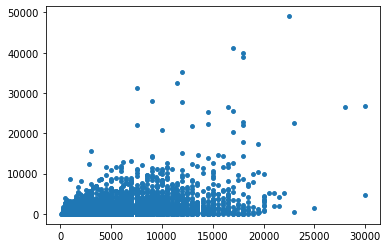

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

## KMEANS CLUSTERING

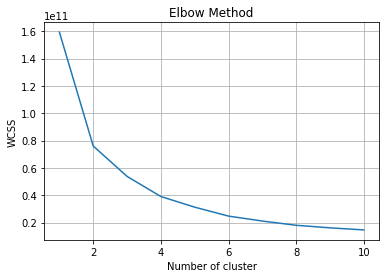

In [9]:
wcss = []
for i in range (1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

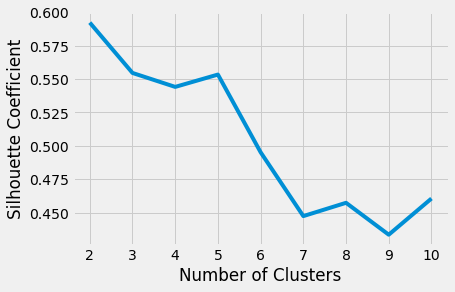

In [10]:
# determine number of cluster with silhouette
silhouette_coefficients = []

# bituce your start at 2 clusters for silhouette coefficient

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

[1 0 0 ... 1 1 1]


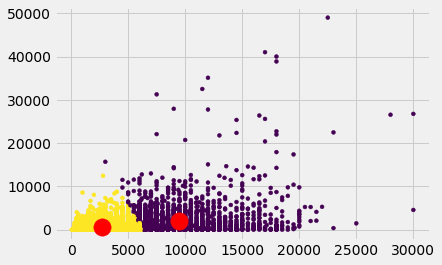

In [11]:
kmeans_cluster = KMeans(n_clusters=2, init="k-means++", max_iter=300 ,n_init=10, random_state=0)

kmeans_result= kmeans_cluster.fit_predict(X)
print(kmeans_result)
plt.scatter(X[:, 0], X[:, 1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0],
            kmeans_cluster.cluster_centers_[:, 1],
            s=300, c='red')

plt.show()

# DBSCAN CLUSTERING


In [12]:
# mencari eps value menggunakan algoritma KNN
from sklearn.neighbors import NearestNeighbors

X = np.array(df.iloc[:, [1,0]])
X
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)

distances = distances[:,1]
distances

array([   0.        ,    0.        ,    0.        , ..., 5006.08781147,
       5882.02546832, 9699.32148601])

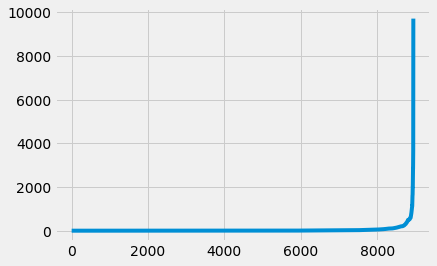

In [13]:
plt.plot(distances)

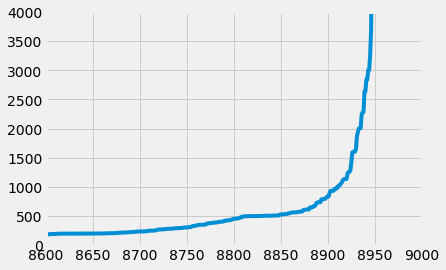

In [14]:
# zoom in graph
plt.plot(distances)
plt.xlim(8600, 9000)
plt.ylim(0, 4000)
plt.show()

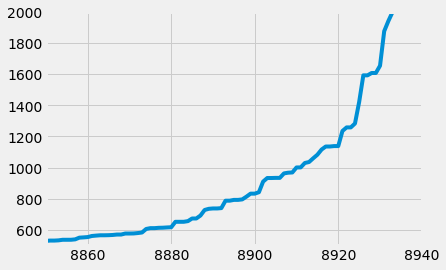

In [15]:
# karena belum terlihat saya zoom lagi
plt.plot(distances)
plt.xlim(8850, 8940)
plt.ylim(500, 2000)
plt.show()

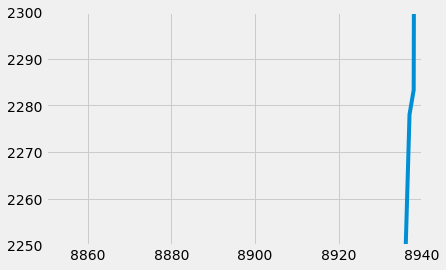

In [16]:
# zoom sumbu Y antara 2250 - 2300 dan sumbu X anara 8850 - 8940
plt.plot(distances)
plt.xlim(8850, 8940)
plt.ylim(2250, 2300)
plt.show()

In [17]:
# mencari epsilon di range 2250 - 2300
eps_values = np.arange(2250, 2300, 1)
min_samples = np.arange(2,5)
dbscan_params = list(product(eps_values,min_samples))

In [18]:
no_of_clusters = []
eps_val = []
min_samp = []


for p in dbscan_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

    if len(np.unique(DBS_clustering.labels_)) <= 1 :
      pass
    else : 
      no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))

    eps_val.append(p[0])
    min_samp.append(p[1])

In [19]:
eps_min = list(zip(no_of_clusters, eps_val, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])

eps_min_df.head()

,no_of_clusters,epsilon_values,minimum_points
0,8,2250,2
1,5,2250,3
2,2,2250,4
3,8,2251,2
4,5,2251,3


In [20]:
# karena jumlah cluster yang akan di gunakan 2 maka select yang no of cluster ==2
eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimum_points
2,2,2250,4
5,2,2251,4
8,2,2252,4
11,2,2253,4
14,2,2254,4
17,2,2255,4
20,2,2256,4
23,2,2257,4
26,2,2258,4
29,2,2259,4


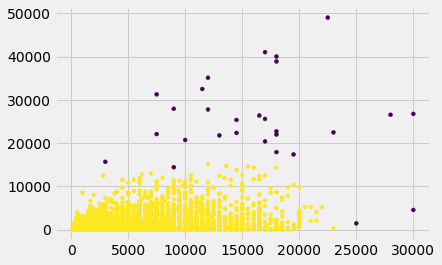

In [21]:
# plot 
DBS_clustering=DBSCAN(eps=2294, min_samples=4)
DBS_clustering.fit(X)

dbscan_result = DBS_clustering.labels_
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)

plt.show()

## CLUSTERING EVALUATION


In [22]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('dbi Kmeans : ', dbi_kmeans)
print('dbi dbscan : ', dbi_dbscan)

dbi Kmeans :  0.7292962157950206
dbi dbscan :  0.4892589679705652


DBI mendekati 0 lebih unggul sehingga dbscan lebih bagus

In [23]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)
print('sil kmeans : ', sil_kmeans)
print('sil_dbscan : ', sil_dbscan)

sil kmeans :  0.5921683157014228
sil_dbscan :  0.8439307537409609


SILHOUETTE SCORE - Lebih tinggi lebih bagus

sehingga dbscan lebih unggul

In [24]:
from sklearn.metrics import calinski_harabasz_score

calinski_kmeans=calinski_harabasz_score(X, kmeans_result)
calinski_dbscan=calinski_harabasz_score(X, dbscan_result)

print(' calinski_kmeans : ', calinski_kmeans)
print(' calinski_dbscan : ', calinski_dbscan)

 calinski_kmeans :  9805.93039165443
 calinski_dbscan :  1298.245290069527


lebih tinggi lebih bagus == dbscan lebih bagus

kesimpulan yang dapat di ambil adalah dbscan lebih unggul dalam melakukan clustering pada dataset CC_GENERAL.csv, hal tersebut dapat di lihat dari dbi  score 0.4892589679705652 dan nilai silhouette score 0.8439307537409609 

referensi : 

http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/